# Linear regression custorm for Diamond price forcasting

In [208]:
import pandas as pd
import numpy as np

# Bước 1: Thu thập dữ liệu và xử lý cơ bản

In [250]:
diamond_df = pd.read_csv('diamonds.csv')

In [252]:
diamond_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [254]:
# Muốn in ra 5 dòng đầu tiên
diamond_df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [256]:
# Xóa cột đầu tiên (không cần đến cột số thứ tự nên ta xóa đi)
diamond_df = diamond_df.drop(['Unnamed: 0'], axis = 1)

In [14]:
diamond_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [73]:
diamond_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [75]:
diamond_df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [77]:
diamond_df.shape

(53940, 10)

# Bước 2: Explore Data (Khám phá dữ liệu)

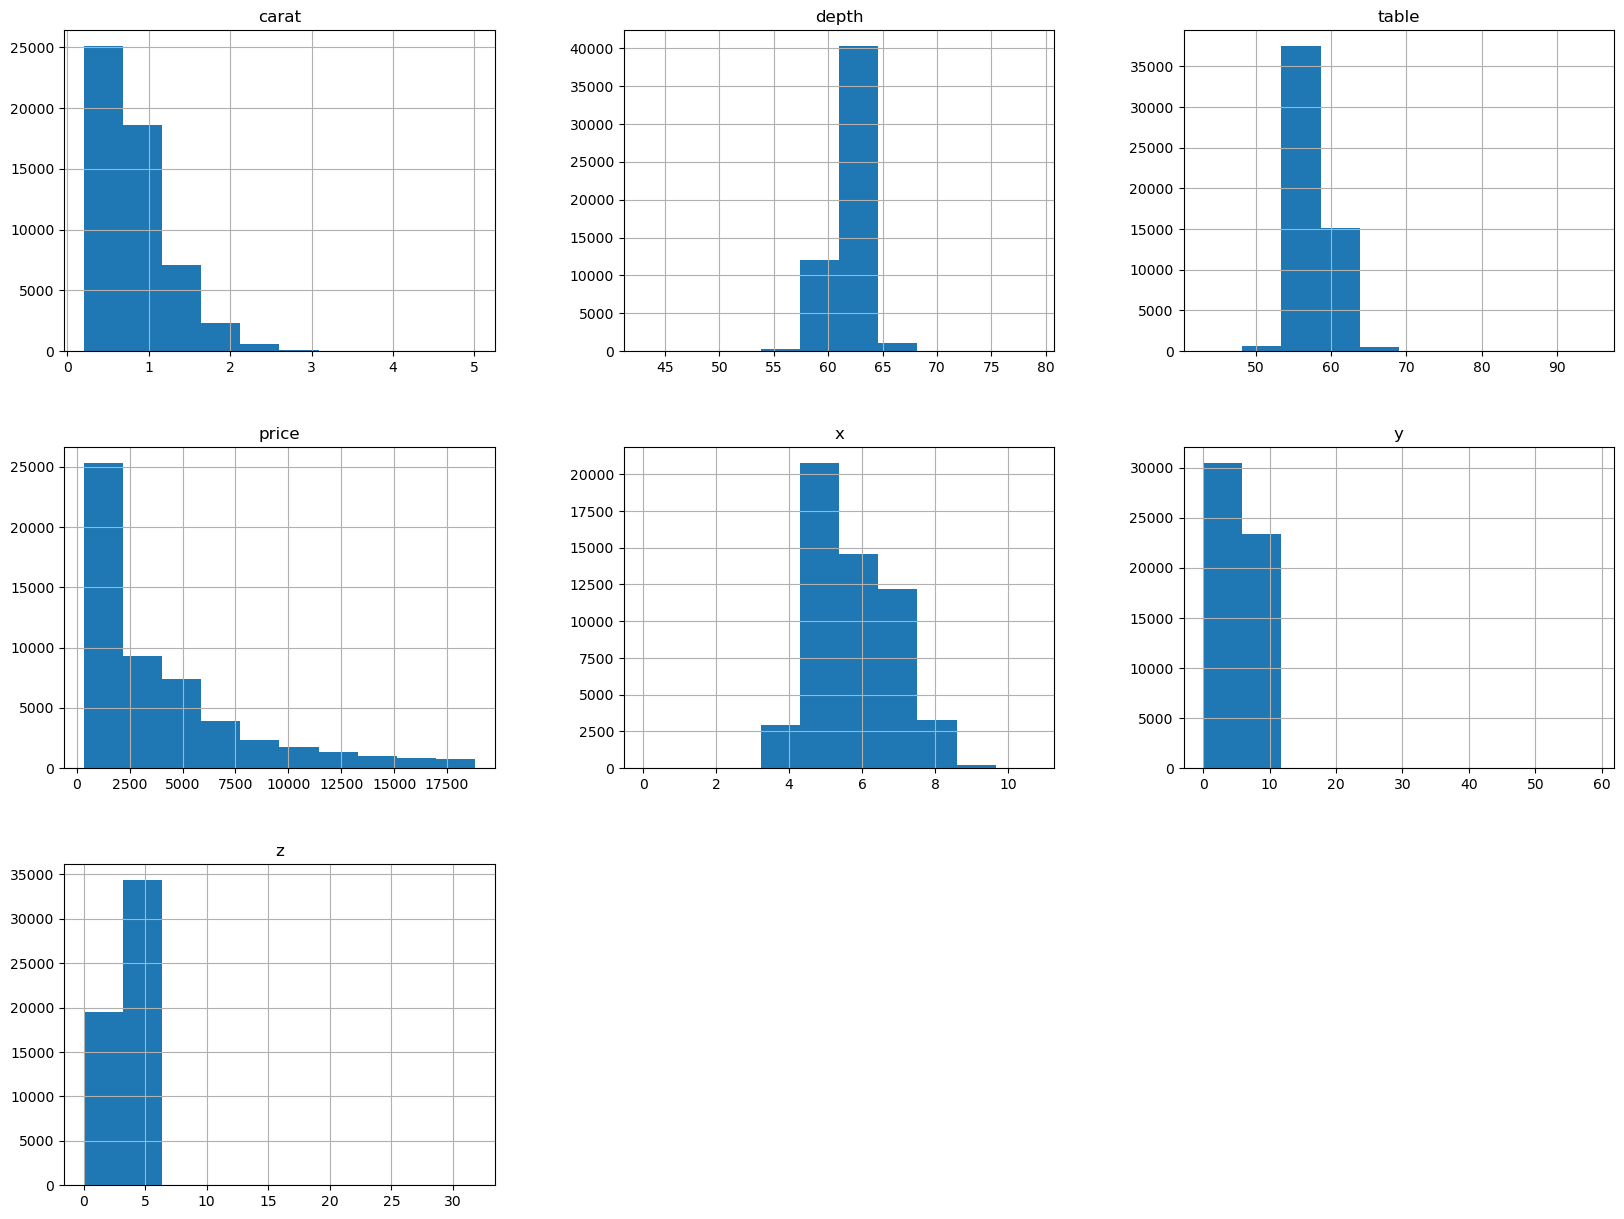

In [79]:
import matplotlib.pyplot as plt

diamond_df.hist(figsize = (20, 15));
plt.show()

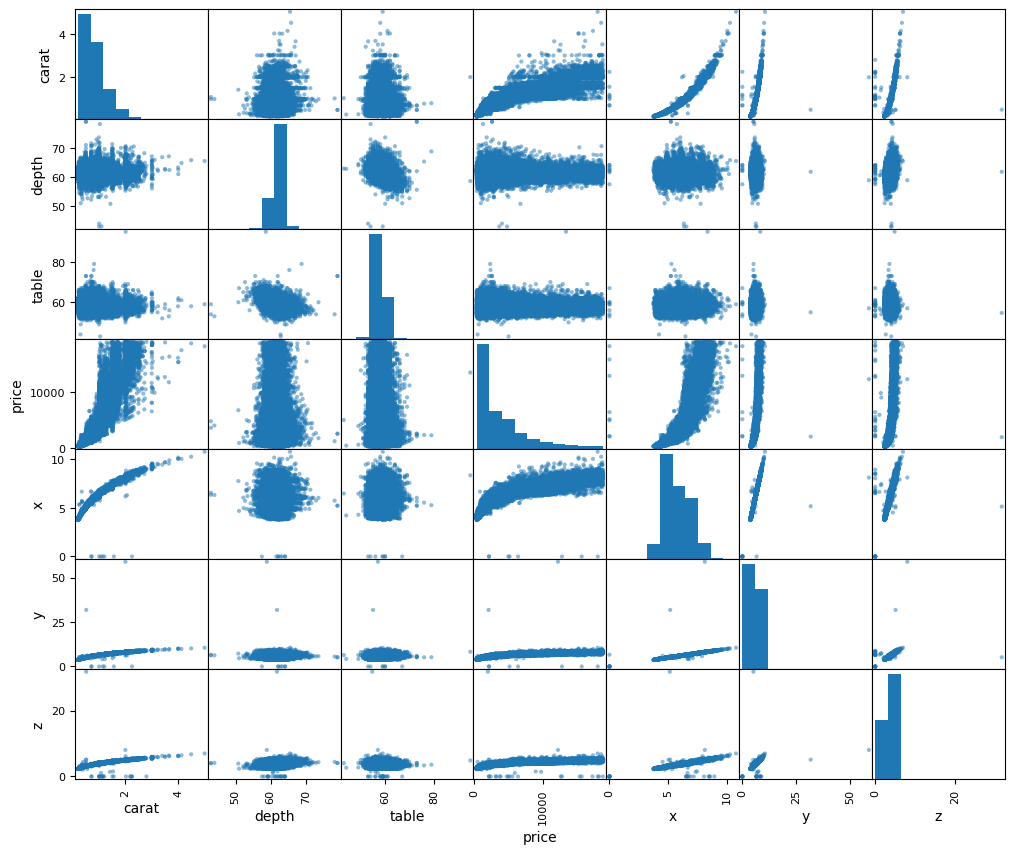

In [81]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(diamond_df, figsize=(12,10));
plt.show()

# Bước 3: Data Preparation (chuẩn bị dữ liệu)

In [258]:
# Encoding the ordinal cateogircal variable 'color'
color_mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
diamond_df.color = diamond_df.color.map(color_mapping)

In [260]:
# Encoding the ordinal cateogircal variable 'clarity'
clarity_mapping = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
diamond_df.clarity = diamond_df.clarity.map(clarity_mapping)

In [262]:
# Encoding the ordinal cateogircal variable 'cut'
cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
diamond_df.cut = diamond_df.cut.map(cut_mapping)

In [264]:
diamond_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,6,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,6,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,6,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,2,1,61.0,58.0,2757,6.15,6.12,3.74


In [266]:
diamond_df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.904097,3.405803,3.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,2.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,4.000000,5.000000,4.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [268]:
# Khử nhiễu
diamond_df = diamond_df.drop(diamond_df[diamond_df['x'] == 0].index)
diamond_df = diamond_df.drop(diamond_df[diamond_df['y'] == 0].index)
diamond_df = diamond_df.drop(diamond_df[diamond_df['z'] == 0].index)

## Loại bỏ 1% giá trị lớn hơn phân vị 99% trong DataFrame

### 1. Giới thiệu
Đoạn code dưới đây dùng để **loại bỏ 1% các giá trị lớn nhất** của các cột `depth`, `table`, `x`, `y`, `z` trong DataFrame `diamond_df`. Việc này giúp xử lý các giá trị ngoại lệ (outlier), giúp dữ liệu sạch hơn và phân tích chính xác hơn.

---

### 2. Code
```python
# Loại bỏ 1% giá trị lớn hơn phân vị 99%
diamond_df = diamond_df[diamond_df['depth'] < diamond_df['depth'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['table'] < diamond_df['table'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['x'] < diamond_df['x'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['y'] < diamond_df['y'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['z'] < diamond_df['z'].quantile(0.99)]
```

---

### 3. Giải thích từng dòng
Mỗi dòng thực hiện hai bước chính:
1. **Tính phân vị 99%** của cột tương ứng.
   - `diamond_df['depth'].quantile(0.99)`: Lấy giá trị mà 99% dữ liệu nhỏ hơn hoặc bằng nó.
   - Đây là cách xác định giá trị **ngoại lệ phía trên**.
2. **Giữ lại chỉ các giá trị nhỏ hơn phân vị 99%**.
   - `diamond_df = diamond_df[diamond_df['depth'] < diamond_df['depth'].quantile(0.99)]`
   - Lọc DataFrame để loại bỏ các giá trị lớn hơn mức phân vị 99%.
   - Lặp lại quy trình này cho các cột `table`, `x`, `y`, `z`.

---

### 4. Tại sao cần loại bỏ 1% giá trị lớn nhất?
✅ **Giảm ảnh hưởng của ngoại lệ**: Tránh các giá trị bất thường làm sai lệch mô hình hoặc thống kê.

✅ **Cải thiện mô hình Machine Learning**: Giúp mô hình học trên dữ liệu có tính ổn định hơn.

✅ **Trực quan hóa dữ liệu tốt hơn**: Tránh tình trạng một số điểm dữ liệu quá lớn làm méo đồ thị.

---

### 5. Lưu ý
- Nếu muốn loại bỏ cả **1% giá trị nhỏ nhất**, có thể sử dụng `quantile(0.01)`.
- Có thể thay thế phương pháp này bằng `.clip()` nếu muốn giữ lại dữ liệu nhưng giới hạn giá trị tối đa.

Ví dụ:
```python
diamond_df['depth'] = diamond_df['depth'].clip(upper=diamond_df['depth'].quantile(0.99))
```
Cách này không loại bỏ dòng dữ liệu nhưng giới hạn giá trị ở mức 99% phân vị.

---

### 6. Kết luận
Phương pháp này giúp làm sạch dữ liệu, giảm ảnh hưởng của outlier và đảm bảo tính ổn định trong phân tích và mô hình hóa dữ liệu. 🚀


In [270]:
# Khử nhiễu: Loại bỏ 1% giá trị lớn hơn phân vị 99%
diamond_df = diamond_df[diamond_df['depth'] < diamond_df['depth'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['table'] < diamond_df['table'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['x'] < diamond_df['x'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['y'] < diamond_df['y'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['z'] < diamond_df['z'].quantile(0.99)]

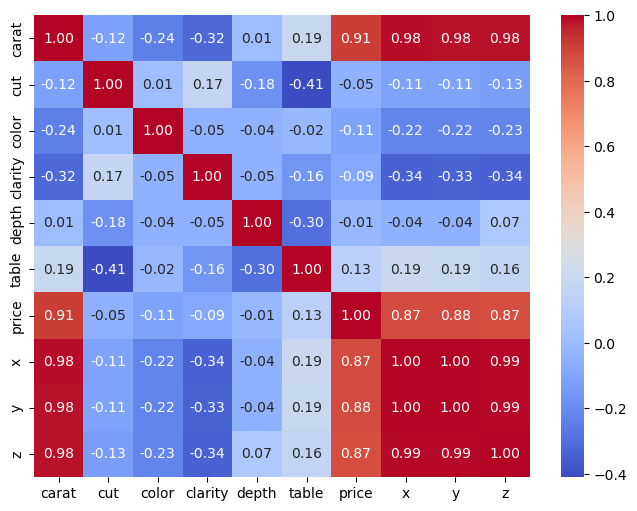

In [265]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(diamond_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [157]:
from sklearn.ensemble import RandomForestRegressor

X = diamond_df.drop(columns=['price'])  # Loại bỏ biến mục tiêu
y = diamond_df['price']

model = RandomForestRegressor()
model.fit(X, y)

importances = model.feature_importances_

# Hiển thị mức độ quan trọng của từng đặc trưng
feature_importance = dict(zip(X.columns, importances))
print(feature_importance)


{'carat': 0.7341823426615873, 'cut': 0.0019116139145099276, 'color': 0.03803438867545413, 'clarity': 0.07761659514309645, 'depth': 0.0028014218535998077, 'table': 0.0020422011069889962, 'x': 0.003919438327740597, 'y': 0.13490938187895404, 'z': 0.004582616438068752}


In [267]:
diamond_df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,0,5,62.8,57.0,336,3.94,3.96,2.48
6,0.24,2,1,6,62.3,57.0,336,3.95,3.98,2.47
7,0.26,2,2,2,61.9,55.0,337,4.07,4.11,2.53
8,0.22,0,5,3,65.1,61.0,337,3.87,3.78,2.49
9,0.23,2,2,4,59.4,61.0,338,4.00,4.05,2.39
10,0.30,1,0,2,64.0,55.0,339,4.25,4.28,2.73


In [324]:
X = diamond_df.drop(['price'], axis = 1) # axis = 1 nghĩa là xóa cột (nhưng tác dộng lên hàng), axis = 0 nghĩa là xóa theo hàng (tác động lên cột).
y = diamond_df['price']
print(X)
print(y)

       carat  cut  color  clarity  depth  table     x     y     z
0       0.23    4      5        1   61.5   55.0  3.95  3.98  2.43
1       0.21    3      5        2   59.8   61.0  3.89  3.84  2.31
3       0.29    3      1        3   62.4   58.0  4.20  4.23  2.63
4       0.31    1      0        1   63.3   58.0  4.34  4.35  2.75
5       0.24    2      0        5   62.8   57.0  3.94  3.96  2.48
...      ...  ...    ...      ...    ...    ...   ...   ...   ...
53935   0.72    4      6        2   60.8   57.0  5.75  5.76  3.50
53936   0.72    1      6        2   63.1   55.0  5.69  5.75  3.61
53937   0.70    2      6        2   62.8   60.0  5.66  5.68  3.56
53938   0.86    3      2        1   61.0   58.0  6.15  6.12  3.74
53939   0.75    4      6        1   62.2   55.0  5.83  5.87  3.64

[51130 rows x 9 columns]
0         326
1         326
3         334
4         335
5         336
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 51130, 

In [326]:
X_arr = X.to_numpy()
y_arr = y.to_numpy()

In [328]:
print(X_arr.shape)
print(y_arr.shape)

(51130, 9)
(51130,)


In [330]:
X_train = X_arr[:int(X_arr.shape[0]*0.8)]
y_train = y_arr[:int(y_arr.shape[0]*0.8)]
X_test = X_arr[int(X_arr.shape[0]*0.8):]
y_test = y_arr[int(y_arr.shape[0]*0.8):]
print(y_test.shape)

(10226,)


## Tóm tắt nhanh về `axis` trong pandas và NumPy

| `axis`   | Hướng tính toán       | Tác động lên |
|----------|----------------------|--------------|
| `axis=0` | Dọc (trên xuống dưới) | Cột          |
| `axis=1` | Ngang (trái sang phải) | Hàng         |

## `Z-score Normalization` trong Feature Scaling

Cách tính `mean` và `std` như trên thường dùng để chuẩn hóa dữ liệu (feature scaling) theo phương pháp `Z-score normalization`:
$$
 X_{scaled} = \frac{X - \text{mean}}{\text{std}} 
$$
```python
import pandas as pd

# Giả sử có DataFrame X_train
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

# Chuẩn hóa dữ liệu
X_scaled = (X_train - X_mean) / X_std


In [332]:
xmean = X_train.mean(axis = 0)
xstd = X_train.std(axis = 0)
X_train = (X_train - xmean) / xstd
X_test = (X_test - xmean) / xstd

In [334]:
X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis = 1)
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]
X_train

array([[ 1.        , -1.27056857,  0.98462391, ..., -1.57334979,
        -1.55818471, -1.58856255],
       [ 1.        , -1.31604588,  0.0336864 , ..., -1.62689306,
        -1.6838459 , -1.76238034],
       [ 1.        , -1.13413663,  0.0336864 , ..., -1.35025282,
        -1.33378971, -1.29886625],
       ...,
       [ 1.        , -0.65662484, -1.86818861, ..., -0.47571272,
        -0.43620974, -0.73395845],
       [ 1.        , -0.54293156,  0.0336864 , ..., -0.38647393,
        -0.43620974, -0.44426215],
       [ 1.        , -0.54293156,  0.98462391, ..., -0.39539781,
        -0.44518554, -0.41529252]])

In [284]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(40904, 10) (40904,) (10226, 10) (10226,)


## Giải thuật linear regression - m samples

In [308]:
import numpy as np
import matplotlib.pyplot as plt

def random_he_so():
    weights = np.random.normal(loc = 0.0, scale = 0.01, size = 10).reshape(-1, 1)
    return weights
    
def get_describe_data(data):
    xmean = np.mean(data)
    xstd = np.std(data)
    return xmean, xstd

def normalization_data(data, xmean, xstd):
    X_normalization = (data - xmean) / xstd
    return X_normalization

if __name__ == "__main__":
    N = X_train.shape[0]
    n_epochs = 2500
    m = 1250
    lr = 0.001
    theta = random_he_so()
    losses = []
    for epoch in range(n_epochs):
        for i in range(0, N, m):
            # Lấy 1 sample
            x = X_train[i:i+m, :]
            y = y_train[i:i+m]
            y = y[:, np.newaxis]
            # predict y_hat
            y_hat = x.dot(theta)
            #compute loss
            loss = (y - y_hat) ** 2
            losses.append(loss[0][0])
            #compute gradient
            dtheta = x.T.dot(2 * (y_hat - y))
            #update weights
            theta = theta - lr * (dtheta / m)
        print(f"Epoch {epoch + 1} / {n_epochs} - Loss: {losses[-1]}")     

Epoch 1 / 2500 - Loss: 2219751.1930213333
Epoch 2 / 2500 - Loss: 2448168.323074871
Epoch 3 / 2500 - Loss: 2482452.536173264
Epoch 4 / 2500 - Loss: 2376091.458080252
Epoch 5 / 2500 - Loss: 2179403.1617290564
Epoch 6 / 2500 - Loss: 1933208.2302354132
Epoch 7 / 2500 - Loss: 1667803.8944087578
Epoch 8 / 2500 - Loss: 1404141.6362580294
Epoch 9 / 2500 - Loss: 1155695.368904467
Epoch 10 / 2500 - Loss: 930333.6898761215
Epoch 11 / 2500 - Loss: 731926.8393359102
Epoch 12 / 2500 - Loss: 561619.2678041988
Epoch 13 / 2500 - Loss: 418786.80983197485
Epoch 14 / 2500 - Loss: 301729.5682541479
Epoch 15 / 2500 - Loss: 208157.35245772032
Epoch 16 / 2500 - Loss: 135519.07859652585
Epoch 17 / 2500 - Loss: 81218.41680418656
Epoch 18 / 2500 - Loss: 42748.609636012836
Epoch 19 / 2500 - Loss: 17771.18357927592
Epoch 20 / 2500 - Loss: 4156.630757071535
Epoch 21 / 2500 - Loss: 0.0024920995203827094
Epoch 22 / 2500 - Loss: 3620.5107175738203
Epoch 23 / 2500 - Loss: 13551.418951745074
Epoch 24 / 2500 - Loss: 2852

## Đánh giá trên tập test

In [336]:
print(theta)

[[3991.57380257]
 [5683.78370059]
 [  97.8425291 ]
 [ 596.82617012]
 [ 865.54310345]
 [ -30.60710211]
 [ -81.99261289]
 [-795.04636663]
 [-267.67725987]
 [-733.20796246]]


In [338]:
test_predictions = X_test.dot(theta)
li = np.mean((test_predictions - y_test) * (test_predictions - y_test))
print(f"MSE: {li}")

MSE: 1359020.8314237623


In [340]:
li = np.mean(np.abs(test_predictions - y_test))
print(f"MAE: {li}")

MAE: 890.2466635759139


In [342]:
np.savez('weight1.npz', x_mean = xmean, x_std = xstd, theta = theta)

In [344]:
np.savez('data1.npz', X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test)